In [2]:
"""
Do a simulation to test the solution to this problem:

Q:
The director of a prison offers 100 death row prisoners, who are numbered from 1 to 100, 
a last chance. A room contains a cupboard with 100 drawers. The director randomly puts 
one prisoner's number in each closed drawer. The prisoners enter the room, one after another. 
Each prisoner may open and look into 50 drawers in any order. The drawers are closed again 
afterwards. If, during this search, every prisoner finds his number in one of the drawers, 
all prisoners are pardoned. If just one prisoner does not find his number, all prisoners die. 
Before the first prisoner enters the room, the prisoners may discuss strategy—but may not 
communicate once the first prisoner enters to look in the drawers. What is the prisoners' 
best strategy?

A:
Surprisingly, there is a strategy that provides a survival probability of more than 30%. 
The key to success is that the prisoners do not have to decide beforehand which drawers to 
open. Each prisoner can use the information gained from the contents of every drawer he 
already opened to help decide which one to open next. Another important observation is 
that this way the success of one prisoner is not independent of the success of the other 
prisoners, because they all depend on the way the numbers are distributed.[2]

To describe the strategy, not only the prisoners, but also the drawers are numbered from 
1 to 100, for example row by row starting with the top left drawer. The strategy is now 
as follows:[3]

Each prisoner first opens the drawer with his own number.
If this drawer contains his number he is done and was successful.
Otherwise, the drawer contains the number of another prisoner and he next opens the drawer 
with this number.
The prisoner repeats steps 2 and 3 until he finds his own number or has opened 50 drawers.
By starting with his own number, the prisoner guarantees he is on a sequence of boxes 
eventually containing his number. The only question is whether this sequence is longer 
than 50 boxes.
"""

# setup
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle

In [3]:
def create_drawers(problem_size):
    drawers = list(range(problem_size))
    shuffle(drawers)
    return(drawers)
    
def search_drawers(prisoner_num, drawers):
    next_i = drawers[prisoner_num]
    for _ in range(len(drawers)/2):
        if drawers[next_i] == prisoner_num:
            return(True)
        else:
            next_i = drawers[next_i]
    return(False)

def run_simulation(problem_size):
    drawers = create_drawers(problem_size)
    num_successes = 0
    
    for prisoner_num in range(problem_size):
        found_number = search_drawers(prisoner_num, drawers)
        num_successes = num_successes + int(found_number)
    
    all_survive = (num_successes == problem_size)
    
    return(all_survive, num_successes)
    
def get_success_rate(problem_size, sample_size, quiet=False):
    simulation_results = [run_simulation(problem_size) for _ in range(sample_size)]
    success_rate = float(sum([int(result[0]) for result in simulation_results]))/float(sample_size)
    
    if not quiet:
        print("Success rate for problem size {}, sample size {}: {}".format(problem_size, sample_size, 
                                                                            success_rate))
        title = "Trials where a given quatity of prisoners found their number, out of {}".format(sample_size)
        n, bins, patches = plt.hist(x=[result[1] for result in simulation_results])

        plt.title(title)
        plt.xlabel("Successful prisoners")
        plt.ylabel("Trials")
        plt.show()
    
    return success_rate
    

Success rate for problem size 100, sample size 1000: 0.345


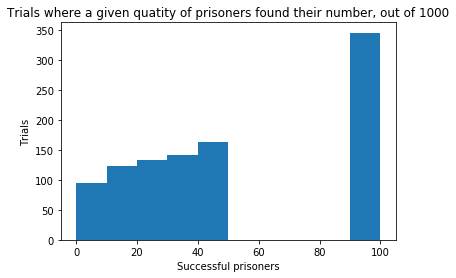

0.345

In [62]:
get_success_rate(100, 1000)

Success rate for problem size 10, sample size 1000: 0.517


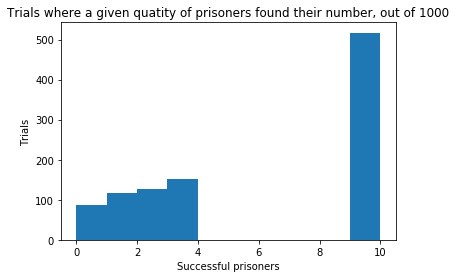

0.517

In [63]:
get_success_rate(10, 1000)

Success rate for problem size 1000, sample size 1000: 0.327


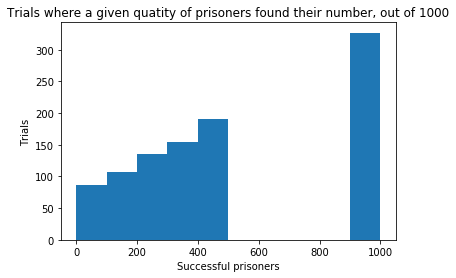

0.327

In [4]:
get_success_rate(1000, 1000)

In [65]:
def get_success_rate_by_problem_size(min_size, max_size, sample_size):
    success_rates = [get_success_rate(problem_size, sample_size, quiet=True)
                    for problem_size in range(min_size, max_size + 1)]
    return(success_rates)

In [66]:
min_size = 10
max_size = 1000
success_rates = get_success_rate_by_problem_size(min_size, max_size, 100)

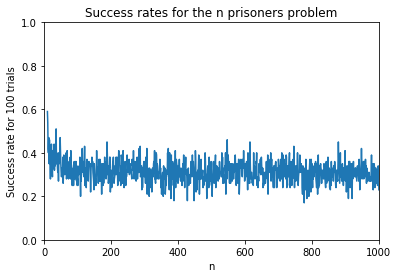

In [67]:
x = range(min_size, max_size + 1)
plt.plot(x, success_rates)
plt.axis([0, max_size, 0, 1])
plt.title("Success rates for the n prisoners problem")
plt.xlabel("n")
plt.ylabel("Success rate for {} trials".format(100))
plt.show()